In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/processed/movies_final.csv')
print('Shape:', df.shape)
df.head()

Shape: (4383, 43)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Star3,Star4,No_of_Votes,Gross,release_year,release_month,profit,roi,overview_length,has_tagline
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Sigourney Weaver,Michelle Rodriguez,1118998.0,"760,507,625",2009.0,10.0,2550965087,11.763566,175,1
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,NaN,NaN,339757.0,NaN,NaN,NaN,661000000,3.203333,176,1
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,NaN,NaN,339757.0,NaN,NaN,NaN,635674609,3.594590,240,1
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Anne Hathaway,Gary Oldman,1516346.0,"448,139,099",NaN,NaN,834939099,4.339756,428,1
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,NaN,NaN,339757.0,NaN,2012.0,7.0,24139100,1.092843,342,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4383 non-null   int64  
 1   genres                4383 non-null   object 
 2   homepage              1624 non-null   object 
 3   id                    4383 non-null   int64  
 4   keywords              4383 non-null   object 
 5   original_language     4383 non-null   object 
 6   original_title        4383 non-null   object 
 7   overview              4382 non-null   object 
 8   popularity            4383 non-null   float64
 9   production_companies  4383 non-null   object 
 10  production_countries  4383 non-null   object 
 11  release_date          1767 non-null   object 
 12  revenue               4383 non-null   int64  
 13  runtime               4383 non-null   float64
 14  spoken_languages      4383 non-null   object 
 15  status               

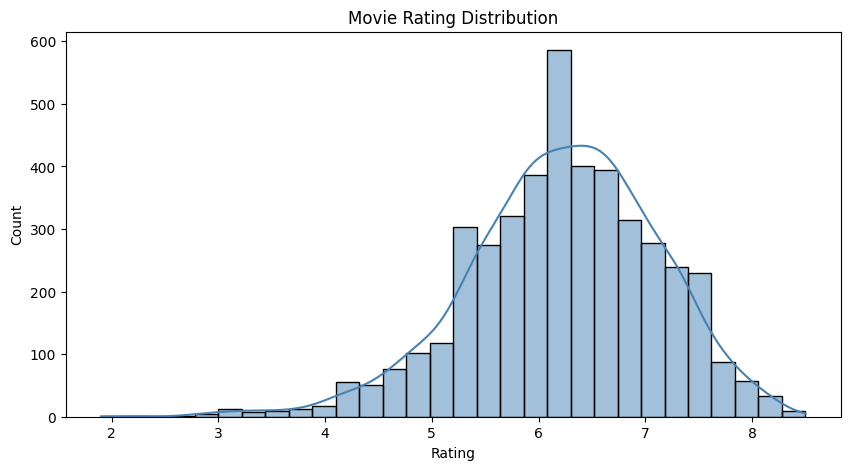

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['vote_average'], bins=30, kde=True, color='steelblue')
plt.title('Movie Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

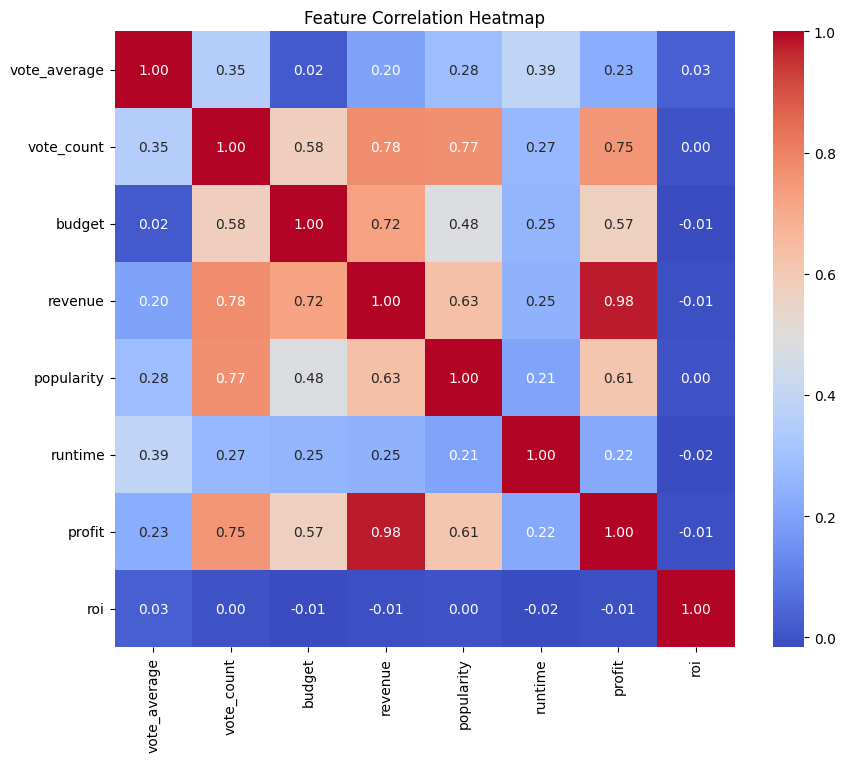

In [5]:
numeric_cols = ['vote_average', 'vote_count', 'budget', 'revenue', 'popularity', 'runtime', 'profit', 'roi']
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
top10 = df.nlargest(10, 'vote_average')[['title', 'vote_average', 'vote_count']]
print('Top 10 Highest Rated Movies:')
print(top10.to_string(index=False))

Top 10 Highest Rated Movies:
                   title  vote_average  vote_count
The Shawshank Redemption           8.5        8205
   The Prisoner of Zenda           8.4          11
           The Godfather           8.4        5893
              Fight Club           8.3        9413
        Schindler's List           8.3        4329
           Spirited Away           8.3        3840
  The Godfather: Part II           8.3        3338
            Pulp Fiction           8.3        8428
                Whiplash           8.3        4254
         The Dark Knight           8.2       12002
